In [1]:
import nivapy3 as nivapy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Compare old and new methods

I have run the new UV absorbance workflow using all the data on `K:\Avdeling\412 Ana\LAMBDA\ABSSPEKTER_KAU` since the beginning of 2016. These data have been uploaded to a temporary table within the `JES` schema for comparison with the data already stored in RESA2.

**Note:** The new code identified a small number of issues with the old datasets on `K:`. These have been ignored/removed from the comparison here.

**Note 2:** The new code does not yet correctly allow for the dilution factor - see the issue [here](https://github.com/NIVANorge/resa_add_uv_abs/issues/1) and the placeholder function [here](https://github.com/NIVANorge/resa_add_uv_abs/blob/fedfd90c45d1ca166e115cc8364272d49da9386c/notebooks/resa_uv_abs.py#L26)

In [2]:
engine = nivapy.da.connect()

Username:  ···
Password:  ··············


Connection successful.


In [3]:
sql = (
    "SELECT a.water_sample_id, "
    "  a.wavelength, "
    "  a.value AS old_value, "
    "  b.value AS new_value "
    "FROM RESA2.ABSORBANCE_SPECTRAS a "
    "INNER JOIN ABSORBANCE_SPECTRAS b "
    "ON ((a.water_sample_id = b.water_sample_id) "
    "AND (a.wavelength      = b.wavelength))"
)
df = pd.read_sql(sql, engine)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842228 entries, 0 to 1842227
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   water_sample_id  int64  
 1   wavelength       int64  
 2   old_value        float64
 3   new_value        float64
dtypes: float64(2), int64(2)
memory usage: 56.2 MB


In [5]:
df['diff'] = df['new_value'] - df['old_value']

<BarContainer object of 100 artists>

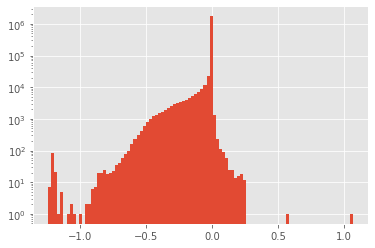

In [6]:
# Distribution of differences
arr, bins, patches = plt.hist(df['diff'], bins=100, log=True)
patches

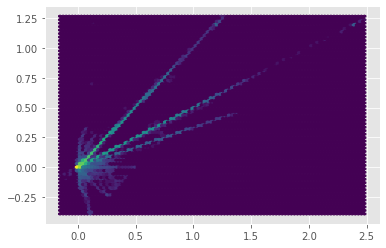

In [7]:
# Hex bin "scatterplot"
plt.hexbin(df["old_value"], df["new_value"], bins='log')

In [8]:
#sn.jointplot(data=df.iloc[:100000], x="old_value", y="new_value", kind="hex")